In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


## Some Numerical Information about the Data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [40]:
df.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      525
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
FriedPotato_Consumption           69
dtype: int64

## Data Cleaning

In [3]:
# Drop unnecessary columns
df.drop(['Height_(cm)', 'Weight_(kg)'], axis=1, inplace=True)

## Data Visualization

In [4]:
# Define list of Continuous columns Names
continuous = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption']

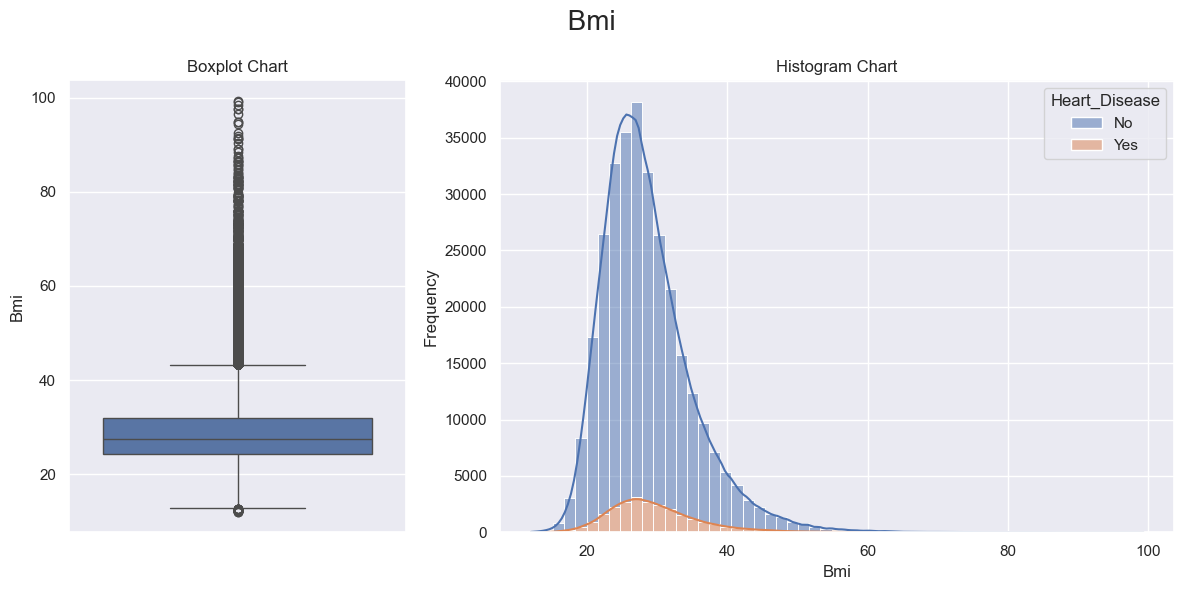

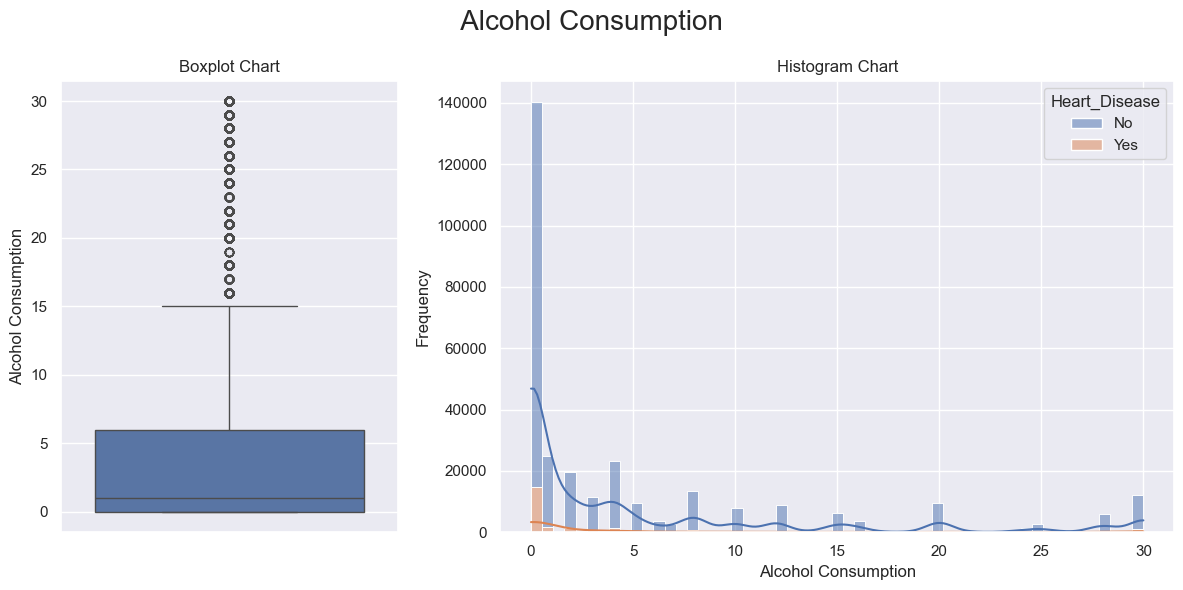

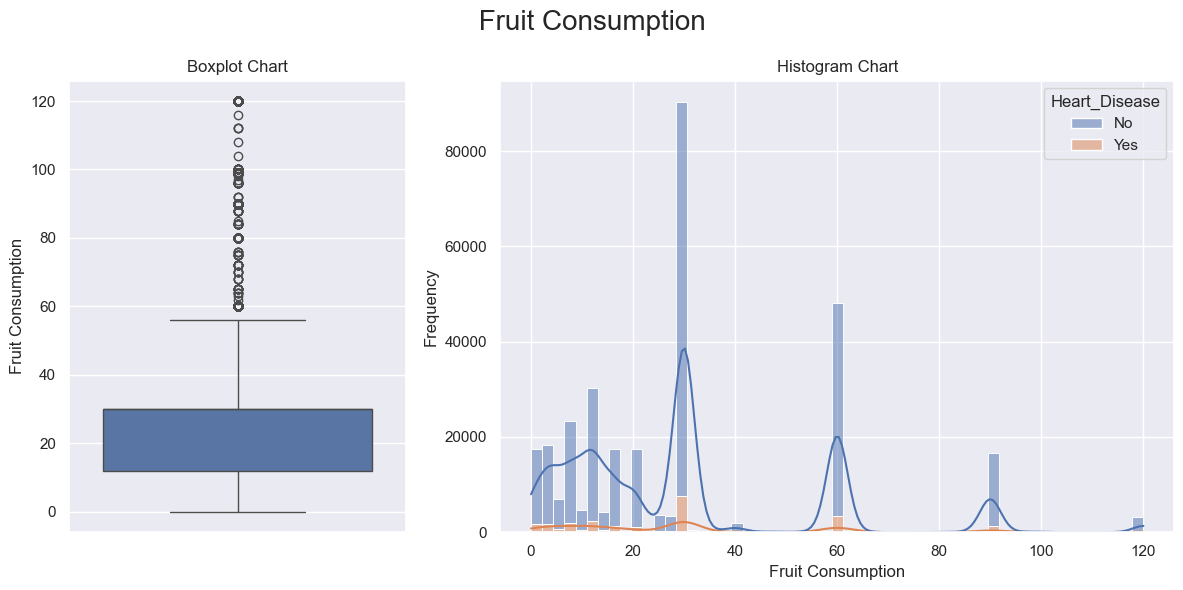

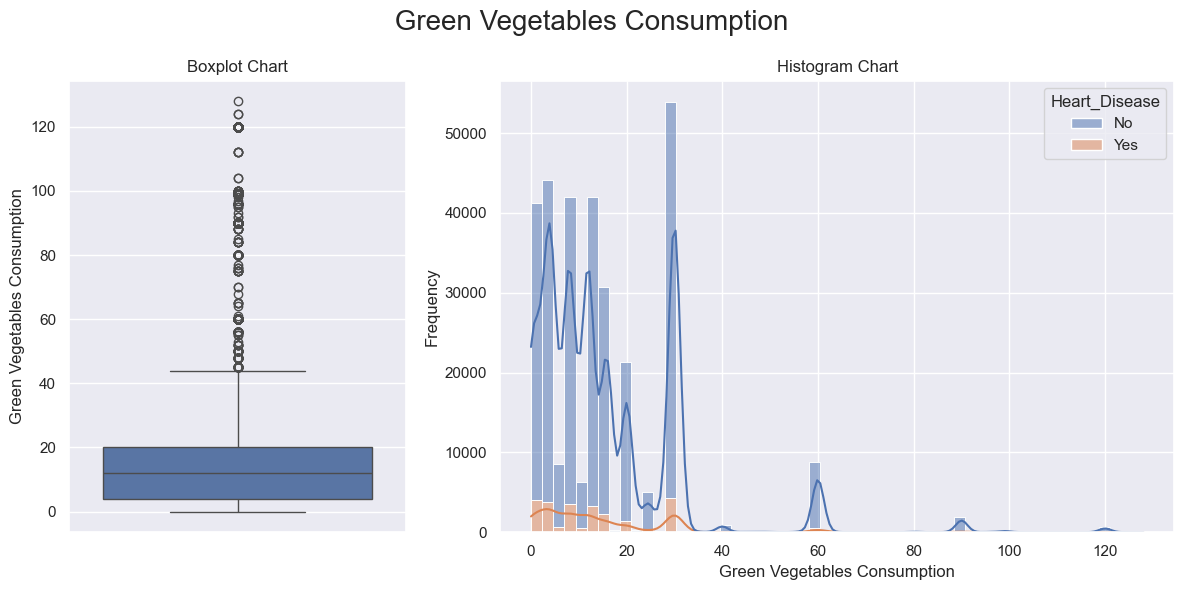

In [5]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()    
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'Heart_Disease')    

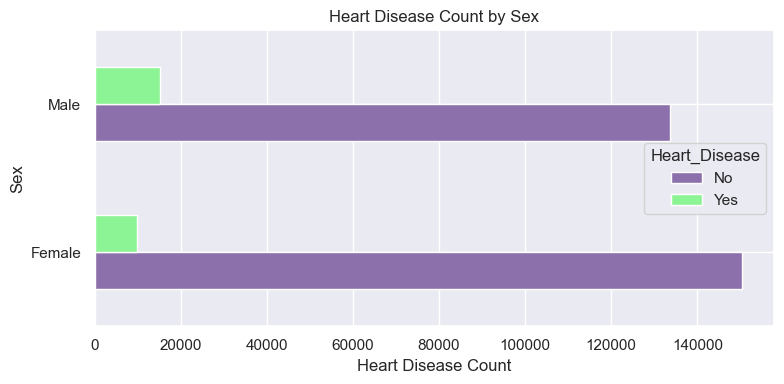

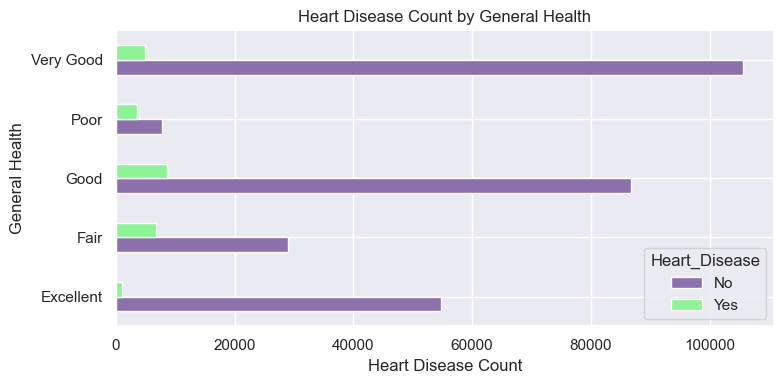

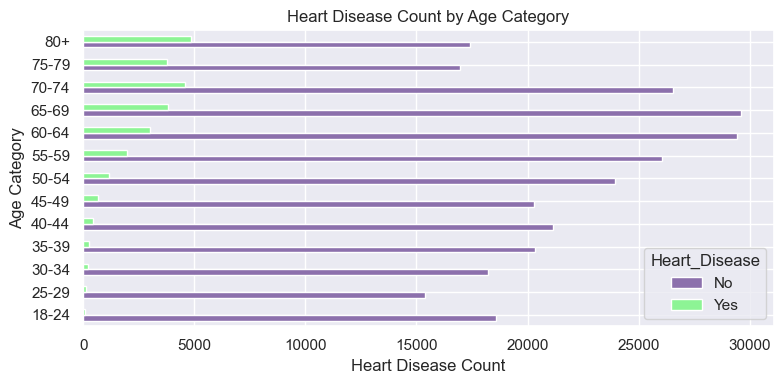

In [7]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x, y]).size().unstack()
    barh.plot(kind='barh',  color = ['#8c70ac', '#8df495'], figsize=(8,4))
    plt.title(f'{title(y)} Count by {title(x)}')
    plt.xlabel(f'{title(y)} Count')
    plt.ylabel(title(x))

    plt.tight_layout()
    plt.show()

bar_plot('Sex', 'Heart_Disease', df)
bar_plot('General_Health', 'Heart_Disease', df)
bar_plot('Age_Category', 'Heart_Disease', df)

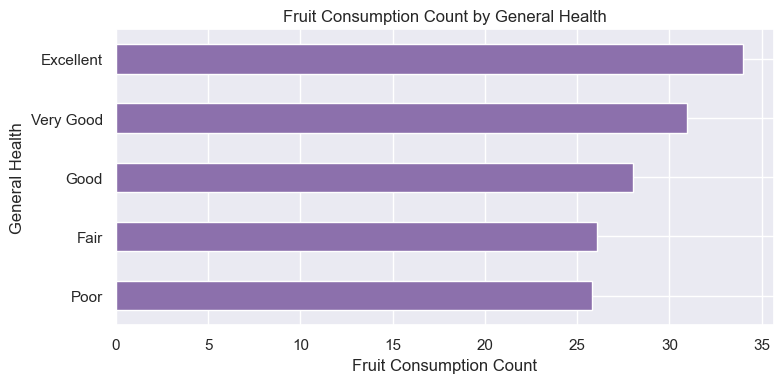

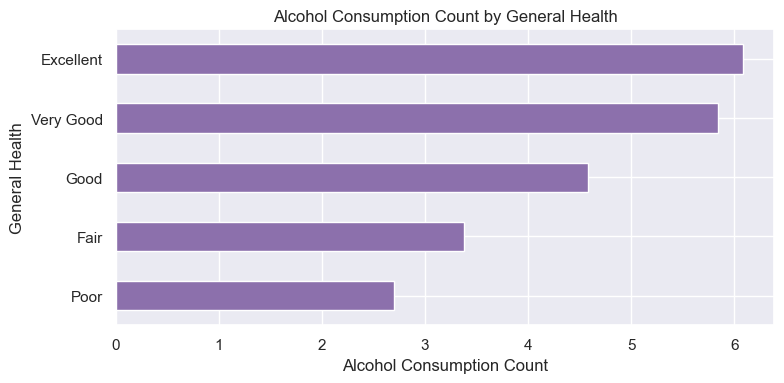

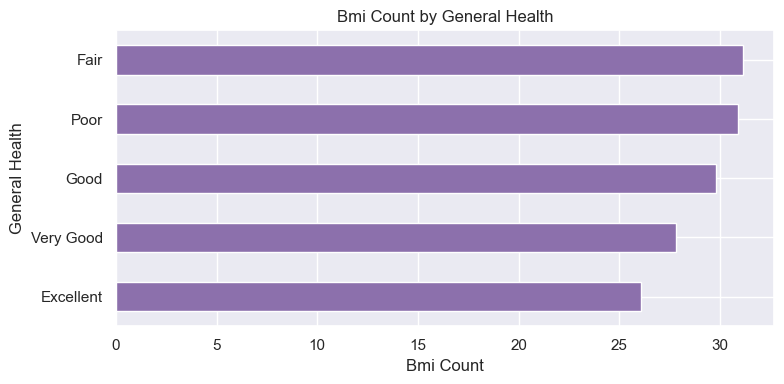

In [9]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x])[y].mean()
    barh.sort_values(ascending=True, inplace=True)
    barh.plot(kind='barh',  color = '#8c70ac', figsize=(8,4))
    plt.title(f'{title(y)} Count by {title(x)}')
    plt.xlabel(f'{title(y)} Count')
    plt.ylabel(title(x))

    plt.tight_layout()
    plt.show()

bar_plot('General_Health', 'Fruit_Consumption', df)
bar_plot('General_Health', 'Alcohol_Consumption', df)
bar_plot('General_Health', 'BMI', df)

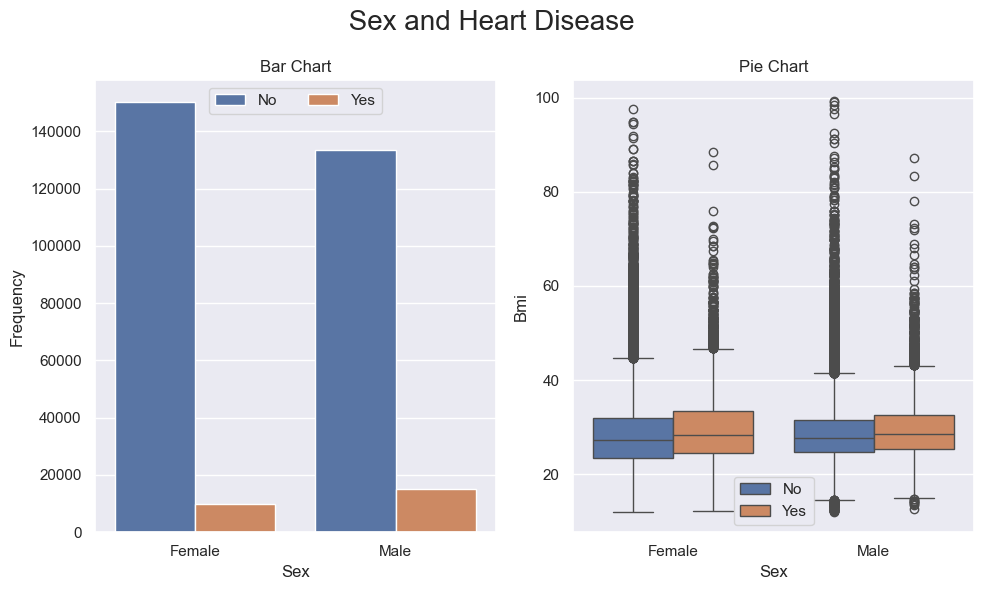

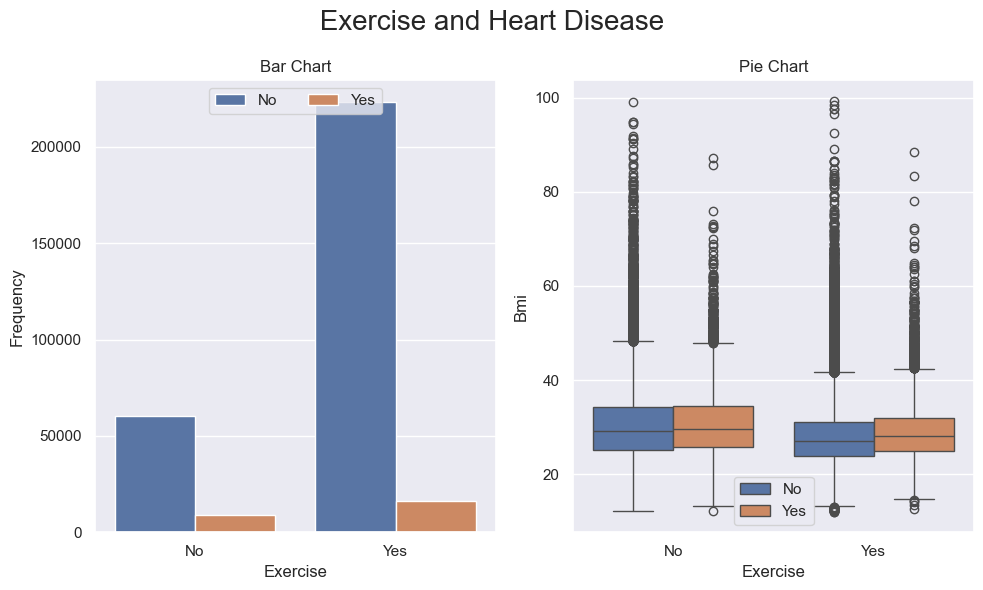

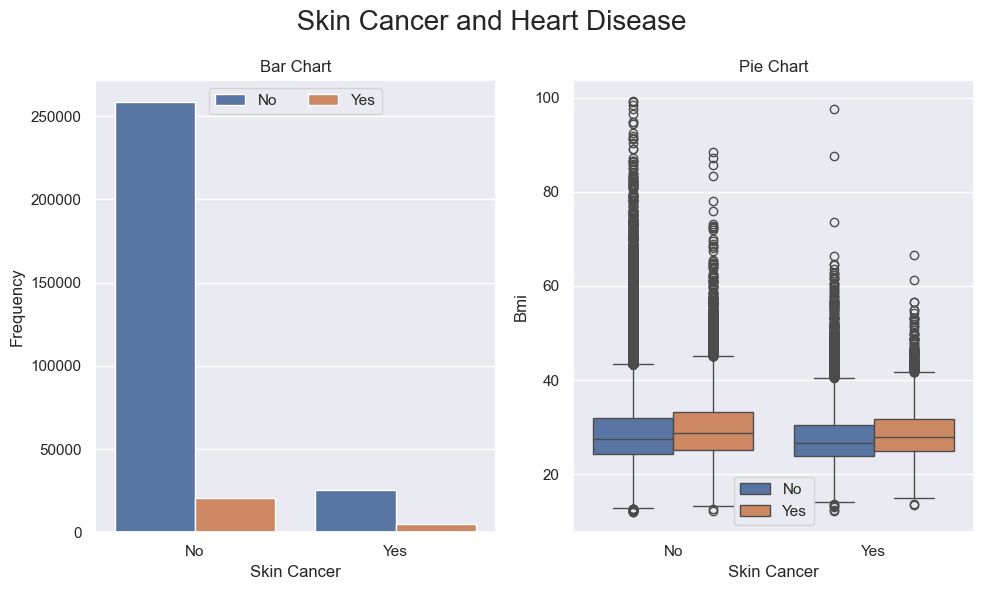

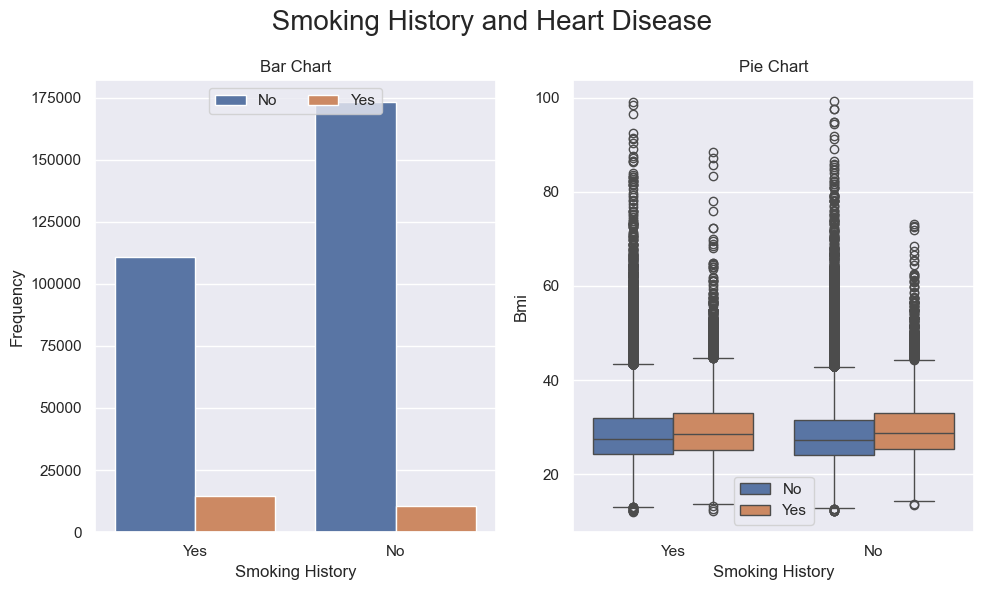

In [10]:
# distribution of categorical features

def plot_categorical(data, x, y, hue):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {title(x)} and {title(hue)} ', fontsize=20) 
    
    sns.countplot(x=x, hue=hue, data=data, ax=ax[0])
    ax[0].set_title('Bar Chart')
    ax[0].set_ylabel('Frequency')
    ax[0].set_xlabel(title(x))
    ax[0].legend(loc='upper center', title=None, ncol=2)
    
    sns.boxplot(x=x, y=y, hue=hue, data=data, ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_xlabel(title(x))
    ax[1].set_ylabel(title(y))
    ax[1].legend(loc='lower center', title=None)
    
    plt.tight_layout()
    plt.show()

plot_categorical(x='Sex', y='BMI', hue='Heart_Disease', data=df)
plot_categorical(x='Exercise', y='BMI', hue='Heart_Disease', data=df)
plot_categorical(x='Skin_Cancer', y='BMI', hue='Heart_Disease', data=df)
plot_categorical(x='Smoking_History', y='BMI', hue='Heart_Disease', data=df)

## Data Preprocessing

In [11]:
# columns for outlier removal
cols  = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

#IQR for the selected columns
Q1 = df[cols].quantile(0.2)
Q3 = df[cols].quantile(0.8)
IQR = Q3 - Q1

#Threshold for outlier removal
threshold = 1.5

#Find index of outliers
index = np.where((df[cols] < (Q1 - threshold * IQR)) | (df[cols] > (Q3 + threshold * IQR)))[0]

#Drop outliers
df = df.drop(df.index[index])
df.shape

(268176, 17)

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

stc_cols = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'BMI']
le_cols = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Sex', 'Smoking_History', 'Arthritis']
dum_cols = ['General_Health', 'Checkup', 'Diabetes', 'Age_Category']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply Label Encoder to the selected columns
for col in le_cols :
    df[col] = le.fit_transform(df[col])

# Apply get_dummies to the selected columns
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [13]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Heart_Disease'], axis=1)
y = df['Heart_Disease']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [15]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()

Training accuracy: Gradient Boosting 0.9203691619278456
Test accuracy: Gradient Boosting 0.9181333432769035

Training accuracy: Logistic Regression 0.9201873776451943
Test accuracy: Logistic Regression 0.918021478111716

Training accuracy: Random Forest 0.9999160995618532
Test accuracy: Random Forest 0.915989260944142

Training accuracy: Decision Tree 0.9999766943227371
Test accuracy: Decision Tree 0.864065180102916

Training accuracy: XGB Classifier 0.9248764799105061
Test accuracy: XGB Classifier 0.9174062197031845



In [10]:
#Craete a Object of Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train and Evaluate the Model
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

accuracy = accuracy_score(y_test, gb_pred)
print(f'R-squared (Gradien Boosting Classifier): {round(accuracy, 3)}')

R-squared (Gradien Boosting Classifier): 0.918


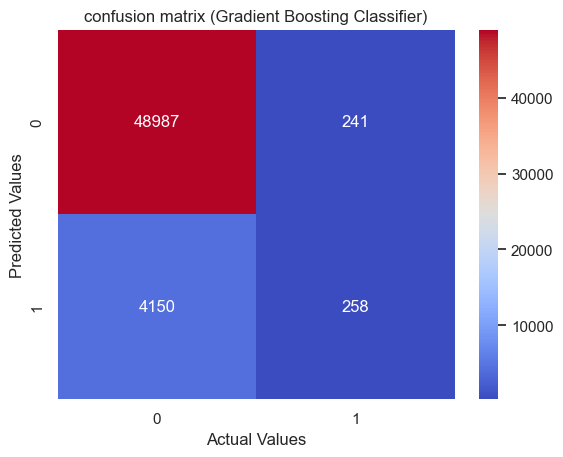

In [11]:
# Visualize confusion matrix for Gradient Boosting Classifier
sns.heatmap(confusion_matrix(y_test,gb_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.title('confusion matrix (Gradient Boosting Classifier)')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [12]:
# Visualize Classification report for Gradient Boosting Classifier
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     49228
           1       0.52      0.06      0.11      4408

    accuracy                           0.92     53636
   macro avg       0.72      0.53      0.53     53636
weighted avg       0.89      0.92      0.89     53636



### As we can see in the above cell , precision of our model in the '1' values of taget is too weak , so we gonna use of imblearn library for balancing values of target 

In [17]:
# redefine x and y
x = df.drop(['Heart_Disease'], axis=1)
y = df['Heart_Disease']  # Target Variable

In [18]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN()

# Apply ADASYN to the x and y 
x_resampled, y_resampled = adasyn.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [19]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()

Training accuracy: Gradient Boosting 0.879558167170852
Test accuracy: Gradient Boosting 0.8807625544970128

Training accuracy: Logistic Regression 0.8099276142995189
Test accuracy: Logistic Regression 0.8104815921201356

Training accuracy: Random Forest 0.9999899078842132
Test accuracy: Random Forest 0.9533646859357339

Training accuracy: Decision Tree 0.9999899078842132
Test accuracy: Decision Tree 0.9088890683029227

Training accuracy: XGB Classifier 0.9410469056311483
Test accuracy: XGB Classifier 0.9400028257710318



In [20]:
#Craete a Object of Random Forest Classifier
rf = RandomForestClassifier()

# Train and Evaluate the Model
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print(f'R-squared (Random Forest Classifier): {round(accuracy, 3)}')

R-squared (Random Forest Classifier): 0.953


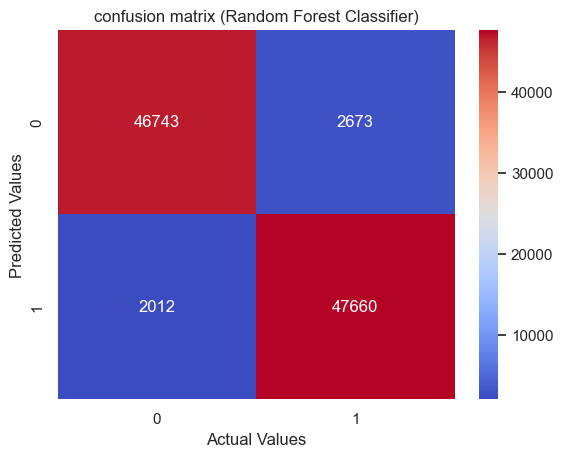

In [21]:
# Visualize confusion matrix for Random Forest Classifier
sns.heatmap(confusion_matrix(y_test,rf_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.title('confusion matrix (Random Forest Classifier)')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [22]:
# Visualize Classification report for Random Forest Classifier
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     49416
           1       0.95      0.96      0.95     49672

    accuracy                           0.95     99088
   macro avg       0.95      0.95      0.95     99088
weighted avg       0.95      0.95      0.95     99088



By employing the ADASYN method, the number of samples for minority classes has increased, leading to an enhancement in the predictive accuracy of the model. Rebalancing the model with new and balanced data has resulted in improved performance in predicting Cardivascular Disease Prediction.

These findings demonstrate that utilizing class balancing techniques like ADASYN can significantly enhance the performance of fraud prediction models. Therefore, it is recommended to employ ADASYN and machine learning models trained using this method for analyzing and predicting warranty claims fraud, as it can lead to improved accuracy and predictive capability of the models.

### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com